# ADP 31회 풀이 연습

각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.

- id: unique id for each row
- Gender: sex - male or female
- Age: age
- Height: height
- Weight: weight
- family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no
- FAVC: Frequent consumption of high caloric food - yes or no
- FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
- NCP: Number of main meals - 1, 2, 3, 4
- CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always
- SMOKE: Do you smoke - yes o no
- CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l
- SCC: Calories consumption monitoring - yes or no
- FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5
- TUE: Time using technology devices - 0 to 2, 3 to 5, >5
- CALC: Consumption of alcohol - no, sometimes, frequently, always
- MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking
- BMI: Body mass index

(종속변수)
NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

# 문항

1-1. EDA & 결측치 및 이상치를 판단하고 처리하라

1-2. 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

1-3. 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

2-1. 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

2-2. 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

2-3. 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

3-1. 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

## 1-1. EDA & 결측치 및 이상치를 판단하고 처리하라

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

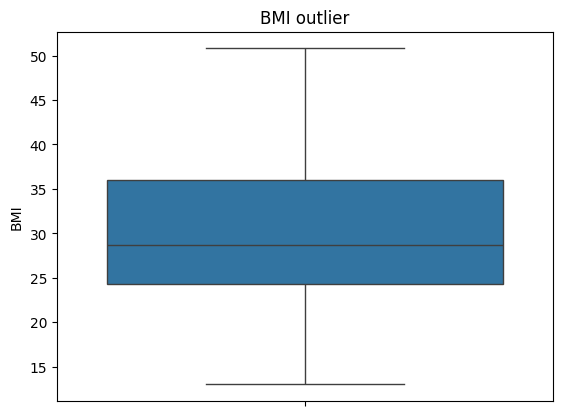

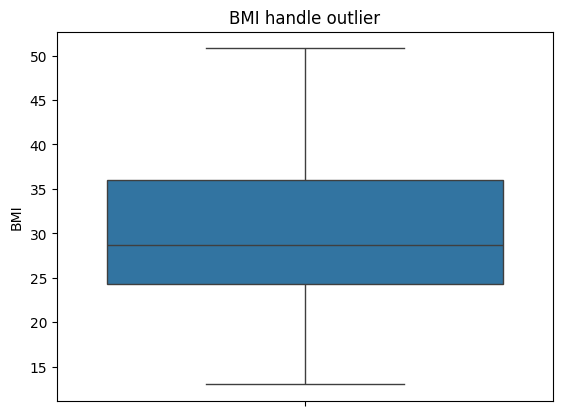

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv(r"data\ObesityDataSet_cleaned_and_data_sinthetic.csv")

print(df.info())
print(df.describe())

# 결측치 탐지
missing_values = df.isnull().sum()
print('결측치 개수:\n', missing_values)

# 이상치 탐지 (BMI 변수 예시)
sns.boxplot(df['BMI'])
plt.title('BMI outlier')
plt.show()

# 이상치 처리 (IQR방식을 이용한 Winsorization)
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['BMI'] = df['BMI'].clip(lower_bound, upper_bound)

# 처리 후 확인
sns.boxplot(df['BMI'])
plt.title('BMI handle outlier')
plt.show()

한 번에 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

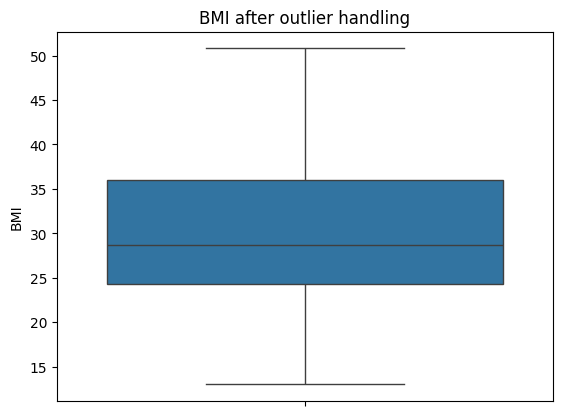

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv(r"data\ObesityDataSet_cleaned_and_data_sinthetic.csv")

print(df.info())
print(df.describe())

# 결측치 탐지
missing_values = df.isnull().sum()
print('결측치 개수:\n', missing_values)

# 이상치 탐지 및 처리 (모든 수치형 컬럼에 대해 IQR 방식 적용)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # 수치형 컬럼만 선택

for col in numeric_columns:
    q1 = df[col].quantile(0.25)  # 1분위
    q3 = df[col].quantile(0.75)  # 3분위
    iqr = q3 - q1                # IQR 계산
    lower_bound = q1 - 1.5 * iqr # 하한선
    upper_bound = q3 + 1.5 * iqr # 상한선
    
    # 이상치 처리 (Winsorization)
    df[col] = df[col].clip(lower_bound, upper_bound)

    print(f"{col} 처리 완료: 하한 {lower_bound}, 상한 {upper_bound}")

# 이상치 처리 후 시각화 (예시: BMI)
sns.boxplot(df['BMI'])
plt.title('BMI after outlier handling')
plt.show()

In [2]:
# object 열 확인
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns: Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')
id: 2111 unique values
Gender: 2 unique values
family_history_with_overweight: 2 unique values
FAVC: 2 unique values
FCVC: 3 unique values
CAEC: 4 unique values
SMOKE: 2 unique values
CH2O: 3 unique values
SCC: 2 unique values
FAF: 4 unique values
TUE: 3 unique values
CALC: 4 unique values
MTRANS: 5 unique values
NObeyesdad: 7 unique values


In [3]:
# FAF, TUE 데이터 내용 확인 (수치형이 아님)
print(df['FAF'].unique())
print(df['TUE'].unique())

df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)

print(df['FAF'].unique())
print(df['TUE'].unique())

['0' '4 to 5' '2 to 4' '1 to 2']
['3 to 5' '0 to 2' '>5']
[0.  4.5 3.  1.5]
[4. 1. 6.]


C:\Users\USER\AppData\Local\Temp\ipykernel_28804\1063813728.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
C:\Users\USER\AppData\Local\Temp\ipykernel_28804\1063813728.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. 라벨 인코딩
label_cols = ['Gender', 'family_history_with_overweight','FCVC', 'FAVC', 'CAEC', 'CH2O', 'CALC', 'MTRANS', 'SMOKE', 'SCC']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # 추후 디코딩 용 저장

# 결과 확인
print(df[label_cols].head())

# 2. Min-Max 스케일링
scaler = MinMaxScaler()
scale_cols = ['Age', 'Height', 'Weight', 'BMI', 'FAF', 'TUE']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 확인
print(df[scale_cols].describe())

   Gender  family_history_with_overweight  FCVC  FAVC  CAEC  CH2O  CALC  \
0       0                               1     2     0     3     0     2   
1       0                               1     0     0     3     2     3   
2       1                               1     2     0     3     0     1   
3       1                               0     0     0     3     0     1   
4       1                               0     2     0     3     0     3   

   MTRANS  SMOKE  SCC  
0       3      0    0  
1       3      1    1  
2       3      0    0  
3       4      0    0  
4       3      0    0  
               Age       Height       Weight          BMI          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.219489     0.474863     0.355140     0.441685     0.335544   
std       0.135257     0.176047     0.195437     0.211867     0.298487   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.127660     0.339623    

효과 설명

1. 라벨 인코딩 :
- 범주형 변수는 머신러닝 모델에서 직접 처리되지 않으므로 숫자로 변환이 필수적임
- 라벨 인코딩은 간단하고 빠르며, 특히 이진 변수에 적합하다. 다만, 다중 클래스의 경우 숫자 크기로 인해 의도치 않은 순서를 학습할 위험이 있어 주의해야 한다.

2. Min-Max 스케일링 :
- 변수가 서로 다른 범위를 가지는 경우, 모델 학습에서 일부 변수가 더 큰 영향을 미치게 된다.
- Min-Max 스케일링은 데이터를 동일한 범위(0~1)로 맞춰 모델의 안정성을 향상시키고, 특히 SVM, KNN과 같은 거리 기반 알고리즘에서 중요한 역할을 한다.

## 1-3. 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

        BMI  family_history_with_overweight       FAF       ARI
0  0.301162                             1.0  0.000000  0.451742
1  0.297240                             1.0  1.000000  0.222930
2  0.284736                             1.0  0.666667  0.256263
3  0.366359                             0.0  0.666667  0.219816
4  0.405778                             0.0  0.000000  0.405778


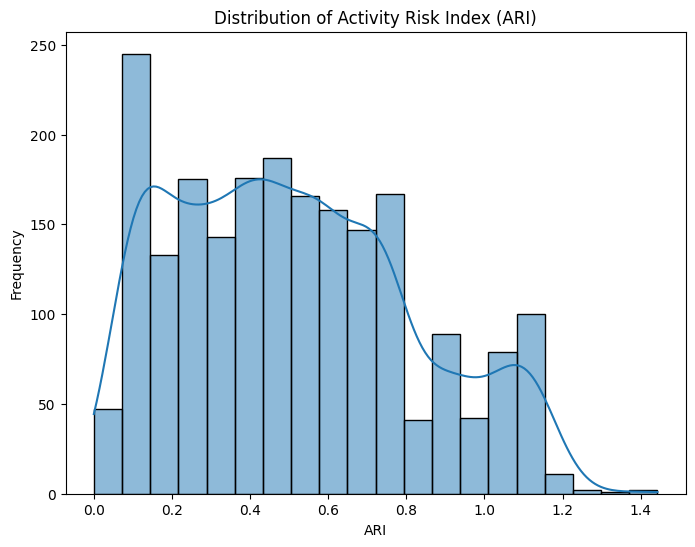

In [5]:
# 파생변수 생성
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(float)
df['ARI'] = (df['BMI'] * (1 + 0.5 * df['family_history_with_overweight'])) / (1 + df['FAF'])

# 결과 확인
print(df[['BMI', 'family_history_with_overweight', 'FAF', 'ARI']].head())

# ARI 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['ARI'], kde=True, bins=20)
plt.title('Distribution of Activity Risk Index (ARI)')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()

1. ARI 정의 및 공식
**Activity Risk Index (ARI)**는 개인의 비만 위험을 정량적으로 평가하기 위해 만들어진 파생 변수입니다. 이는 다음 세 가지 주요 요소를 기반으로 계산됩니다:

- BMI (Body Mass Index):
    - 비만의 대표적인 지표로, 체중(kg)을 키(m)의 제곱으로 나눈 값입니다.
    - BMI가 높을수록 비만 위험이 크며, ARI에서 위험의 핵심 요소로 작용합니다.

- family_history_with_overweight (가족 병력):
    - 비만 가족력이 있는 사람은 유전적, 환경적 요인으로 인해 비만 위험이 더 높습니다.
    - 이 값을 0 (병력 없음) 또는 1 (병력 있음)으로 사용하며, 가족 병력이 있을 경우 ARI에 가중치로 반영됩니다.

- FAF (Physical Activity Frequency):
    - 주간 신체 활동 빈도를 나타냅니다.
    - 활동 빈도가 높을수록 비만 위험이 낮아지며, ARI 계산식에서 이를 분모로 사용해 위험을 낮추는 역할을 합니다.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 데이터 준비
X = df.drop(['NObeyesdad', 'id'], axis=1) # 종속변수, id 제외
y = df['NObeyesdad'] # 종속변수

# 데이터 분석
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1.로지스틱 회귀
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# 2. 서포트 벡터 머신
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3. K-NearestNeighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 결과 비교
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Logistic Regression:
                     precision    recall  f1-score   support

insufficient_weight       0.82      0.97      0.89        86
      normal_weight       0.74      0.52      0.61        93
     obesity_type_i       0.83      0.76      0.80       102
    obesity_type_ii       0.84      0.97      0.90        88
   obesity_type_iii       0.95      0.99      0.97        98
 overweight_level_i       0.67      0.64      0.65        88
overweight_level_ii       0.64      0.71      0.67        79

           accuracy                           0.79       634
          macro avg       0.78      0.79      0.78       634
       weighted avg       0.79      0.79      0.79       634

Accuracy: 0.7933753943217665

Support Vector Machine:
                     precision    recall  f1-score   support

insufficient_weight       0.84      0.99      0.91        86
      normal_weight       0.90      0.65      0.75        93
     obesity_type_i       0.99      0.95      0.97       102
    ob

In [7]:
# object 열 확인
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns: Index(['id', 'NObeyesdad'], dtype='object')
id: 2111 unique values
NObeyesdad: 7 unique values


### 가장 성능이 좋은 모델 : SVM
Accuracy: 0.8943217665615142

# 2-2. 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

- SVM의 하이퍼파라미터 탐색
- 성능 지표(Precision, Recall, F1-Score)

### 튜닝 대상
1. C(Regularization Parameter)
2. Kernel : 선형(linear), 다항식(poly), RBF(rbf), 시그모이드(sigmoid) 등을 탐색
3. Gamma: RBF, 다항식, 시그모이드 커널에서 사용하는 파라미터

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# 하이퍼파라미터 탐색 공간

"""
1. C(Regularization Parameter)
정규화 를 작게 (C=0.1) 마진을 넓게 설정하여 단순한 모델을 생성
과대적합 방지에 유리하나 과소적합 위험 존재
정규화를 크게 (C=100) 낮은 정규화 정도를 적용하여 데이터 점수를 더 잘 맞추는 모델을 생성

2. kernal 유형
데이터를 매핑하여 더 높은 차원 공간에서 선형적으로 분리될 수 있도록 하는 함수
linear(선형 커널) :
    - 데이터가 고차원 변환 없이도 선형적으로 분리 가능한 경우 적합
    - 계산 비용이 적어 대규모 데이터에 적합

rbf(Radial Basis Function) : 
    - 비선형 데이터를 처리하기 위해 자주 사용되는 기본 커널
    - 고차원으로 매핑하여 복잡한 데이터 분포 처리-
    - 결정 경계가 부드럽고 유연

poly(다항식 커널) :
    - 데이터의 다항 관계를 학습
    - 다항식 차수(degree)를 설정해야 하며, 차수가 클수록 복잡한 경계 생성

sigmoid(시그모이드 커널):
    - 데이터가 S-곡선을 따르는 경우 적합
    - 뉴럴 네트워크의 활성화 함수와 유사

rbf는 데이터 분포가 복잡하거나 클래스 경계가 비선형인 경우 일반적으로 우수한 성능을 보임
linear는 데이터가 단순 분리가 가능한 경우 적합.

3. gamma
rbf, 다항식, 시그모이드 커널에서 결정 경계의 복잡성을 제어하는 파라미터
- 작은 값 (gamma=0.01):
    - 결정 경계가 부드러워지고, 더 많은 데이터 포인트를 고려
    - 단순한 모델을 생성 -> 과적합 방지

- 큰 값(gamma=1):
    - 결정 경계가 복잡해지며, 각 데이터 포인트에 민감
    - 복잡한 데이터 패턴을 잘 학습하지만 과적함 위험

활용 : 데이터가 복잡하거나 경계가 세밀한 경우에는 높은 gamma를, 일반적인 경우에는 gamma를 선택 

"""

param_grid = {
    'C' : [0.1, 1, 10, 100], # 정규화 강도
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], # 커널 종류
    'gamma' : ['scale', 'auto', 0.01, 0.1, 1] # 감마 값
}

# SVM 모델 정의
# soft-voting 위해 probability=True
svm = SVC(probability=True, random_state=42)

# GridSearchCV 설정
# n_jobs : GridSearchCV에서 사용되는 CPU 코어 수를 설정하는 파라미터 기본값은 None(단일 코어), n_jobs=-1 -> 모든 코어 병렬 처리리
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameter:", grid_search.best_params_)
print("Best f1_score:", grid_search.best_score_)

# 최적의 모델로 데이터 평가
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# 평가 지표 출력
print("classification report for best svm", classification_report(y_test, y_pred_svm))
print("Accuracy", accuracy_score(y_test, y_pred_svm))
print("Precision", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall", recall_score(y_test, y_pred_svm, average='macro'))
print("F1", f1_score(y_test, y_pred_svm, average='macro'))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameter: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best f1_score: 0.9608353261711325
classification report for best svm                      precision    recall  f1-score   support

insufficient_weight       0.98      0.97      0.97        86
      normal_weight       0.97      0.95      0.96        93
     obesity_type_i       0.99      0.96      0.98       102
    obesity_type_ii       0.95      1.00      0.97        88
   obesity_type_iii       1.00      0.99      0.99        98
 overweight_level_i       0.93      0.97      0.95        88
overweight_level_ii       0.96      0.95      0.96        79

           accuracy                           0.97       634
          macro avg       0.97      0.97      0.97       634
       weighted avg       0.97      0.97      0.97       634

Accuracy 0.9684542586750788
Precision 0.967891928558776
Recall 0.9681727499741536
F1 0.9678269313953516


### [참고] 다른 하이퍼파라미터 튜닝 방법
- 랜덤 서치 
- 베이지안 최적화 (라이브러리 : optuna, Scickit-Optimize)
- 하이퍼밴드 (라이브러리 : Optuna Hyperband)
- 그리디 서치 (Optuna Huperband)
- 진화 알고리즘 (DEAP)


# 2-3. 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라
각 모델이 출력한 클래스의 확률 값을 평균내어 최종 클래스를 결정


In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# SoftVoting 앙상블 모델 구성
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
        ('svm', SVC(probability=True, random_state=42, kernel='rbf', C=10, gamma=0.1)), # 최적 파라미터
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft' # Soft Voting
)

# 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 수행
y_pred_voting = voting_clf.predict(X_test)

# 성능 평가
print("Soft Voting Classifier:")
print(classification_report(y_test, y_pred_voting))
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting, average='macro'))
print("Recall:", recall_score(y_test, y_pred_voting, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_voting, average='macro'))

Soft Voting Classifier:
                     precision    recall  f1-score   support

insufficient_weight       0.89      0.98      0.93        86
      normal_weight       0.80      0.71      0.75        93
     obesity_type_i       0.91      0.86      0.88       102
    obesity_type_ii       0.88      0.99      0.93        88
   obesity_type_iii       0.97      0.99      0.98        98
 overweight_level_i       0.73      0.69      0.71        88
overweight_level_ii       0.76      0.76      0.76        79

           accuracy                           0.86       634
          macro avg       0.85      0.85      0.85       634
       weighted avg       0.85      0.86      0.85       634

Accuracy: 0.8564668769716088
Precision: 0.8498475533732205
Recall: 0.8543249249303102
F1-Score: 0.8507520549537126


# 3-1. 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

Base Recall: 0.8543


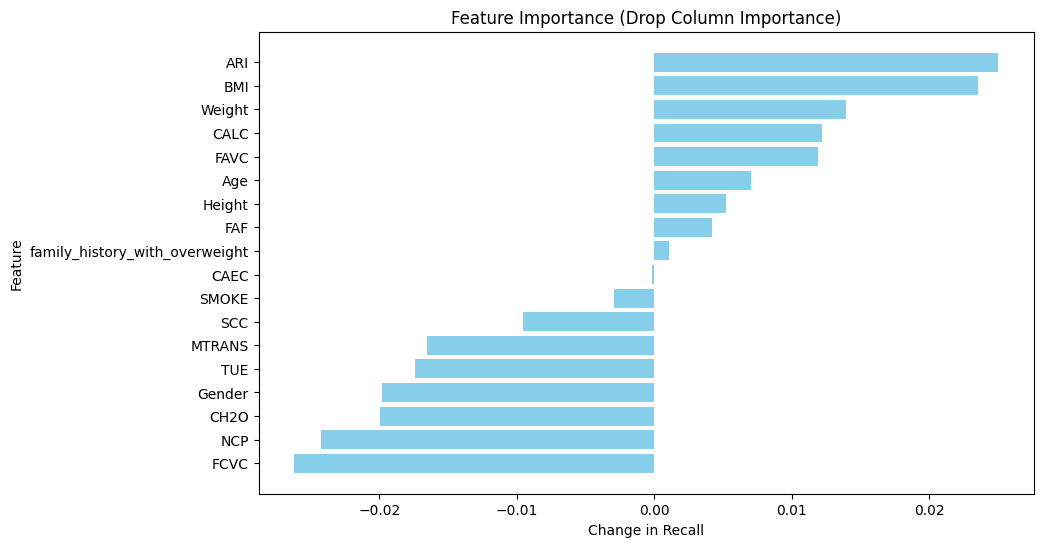

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# 기본 성능 계산
base_model = voting_clf  # Soft Voting 모델 사용
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_recall = recall_score(y_test, base_pred, average='macro')
print(f"Base Recall: {base_recall:.4f}")

# Drop Column Importance 계산
importance_results = {}

for col in X_train.columns:
    # 특정 변수를 제거한 데이터 생성
    X_train_drop = X_train.drop(columns=[col])
    X_test_drop = X_test.drop(columns=[col])

    # 모델 학습 및 평가
    base_model.fit(X_train_drop, y_train)
    drop_pred = base_model.predict(X_test_drop)
    drop_recall = recall_score(y_test, drop_pred, average='macro')

    # 중요도 저장
    importance_results[col] = base_recall - drop_recall  # 올바르게 Recall 차이 계산

# 결과 정렬 및 데이터프레임 생성
importance_df = pd.DataFrame(list(importance_results.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Change in Recall')
plt.ylabel('Feature')
plt.title('Feature Importance (Drop Column Importance)')
plt.gca().invert_yaxis()
plt.show()
